# **ANÁLISIS ITERATIVO DE LAS CATEGORÍAS IDEOLÓGICAS EN WIKIPEDIA**
#### Ramón Zamora, carné 10233

## INTRODUCCIÓN
El presente proyecto utiliza herramientas de análisis de texto computacional para llevar a cabo un exploración de los datos de los artículos vinculados a las categorías de distintas ideologías que se pueden encontrar en la enciclopedia digial Wikipedia. Para llevar a cabo este ejercicio se utilizarán las librerías de ...

In [1]:
import wikipediaapi
import pickle
from pprint import pprint
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dcss.text import bigram_process, preprocess, bow_to_df
from dcss.plotting import format_axes_commas, custom_seaborn
from dcss.utils import sparse_groupby
custom_seaborn()
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import scipy
from itertools import islice

In [2]:
wiki_wiki = wikipediaapi.Wikipedia('Ciencias Sociales Computacionales (can06728@uvg.edu.gt)', 'en')

In [3]:
#11
cat_11th_century = wiki_wiki.page("Category:11th_century")
print("11th_century: %s" % cat_11th_century.exists())
#12. 
cat_12th_century = wiki_wiki.page("Category:12th_century")
print("12th_century: %s" % cat_12th_century.exists())
#13. 
cat_13th_century = wiki_wiki.page("Category:13th_century")
print("13th_century exist: %s" % cat_13th_century.exists())
#14. 
cat_14th_century = wiki_wiki.page("Category:14th_century")
print("14th_century exist: %s" % cat_14th_century.exists())
#15. 
cat_15th_century = wiki_wiki.page("Category:15th_century")
print("15th_century: %s" % cat_15th_century.exists())
#16. 
cat_16th_century = wiki_wiki.page("Category:16th_century")
print("16th_century: %s" % cat_16th_century.exists())
#17. 
cat_17th_century = wiki_wiki.page("Category:17th_century")
print("17th_century exist: %s" % cat_17th_century.exists())
#18 
cat_18th_century = wiki_wiki.page("Category:18th_century")
print("18th_century: %s" % cat_18th_century.exists())
#19 
cat_19th_century = wiki_wiki.page("Category:19th_century")
print("19th_century: %s" % cat_19th_century.exists())
#20 
cat_20th_century = wiki_wiki.page("Category:20th_century")
print("20th_century exist: %s" % cat_20th_century.exists())
#21 
cat_21st_century = wiki_wiki.page("Category:21st_century")
print("21st_century exist: %s" % cat_21st_century.exists())
#22 
cat_22nd_century = wiki_wiki.page("Category:22nd_century")
print("22nd_century exist: %s" % cat_22nd_century.exists())


11th_century: True
12th_century: True
13th_century exist: True
14th_century exist: True
15th_century: True
16th_century: True
17th_century exist: True
18th_century: True
19th_century: True
20th_century exist: True
21st_century exist: True
22nd_century exist: True


In [4]:
data = []
pages_names = cat_11th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_11th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_12th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_12th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_13th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_13th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_14th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_14th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_15th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_15th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_16th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_16th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_17th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_17th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_18th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_18th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }

    )

    pages_names = cat_19th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_19th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }

    )

pages_names = cat_20th_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_20th_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

    pages_names = cat_21st_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_21st_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )
    
    pages_names = cat_22nd_century.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_22nd_century,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )
    df = pd.DataFrame(data)

In [5]:
df.to_csv('Century.csv')

In [6]:
columns = ['Category', 'Namespace', 'Title', 'Summary' 'Content']
wiki_df = pd.read_csv('Century.csv')
wiki_df.dropna(subset = ['Title', 'Summary'], inplace=True)
wiki_df =wiki_df.query('Namespace < 1')
wiki_df['Category'].value_counts()

Category:20th century (id: 884457, ns: 14)    88
Category:21st century (id: 884422, ns: 14)    57
Category:19th century (id: 884481, ns: 14)    37
Category:18th century (id: 884546, ns: 14)    27
Category:16th century (id: 884483, ns: 14)    21
Category:17th century (id: 884542, ns: 14)    17
Category:12th century (id: 884616, ns: 14)    15
Category:13th century (id: 884730, ns: 14)    14
Category:15th century (id: 884535, ns: 14)    14
Category:14th century (id: 886533, ns: 14)    12
Category:11th century (id: 884710, ns: 14)    11
Category:22nd century (id: 886534, ns: 14)     2
Name: Category, dtype: int64

In [7]:
content_keep = [
'Category:20th century (id: 884457, ns: 14)',
'Category:21st century (id: 884422, ns: 14)',
'Category:19th century (id: 884481, ns: 14)',
'Category:18th century (id: 884546, ns: 14)',
'Category:16th century (id: 884483, ns: 14)',
'Category:17th century (id: 884542, ns: 14)',
'Category:12th century (id: 884616, ns: 14)',
'Category:13th century (id: 884730, ns: 14)',
'Category:15th century (id: 884535, ns: 14)',
'Category:14th century (id: 886533, ns: 14)',
'Category:11th century (id: 884710, ns: 14)',
'Category:22nd century (id: 886534, ns: 14)',
]
content_subset = wiki_df[wiki_df['Category'].isin(content_keep)].copy()
content_subset.reset_index(drop=True, inplace=True)
total_content_counts = content_subset['Category'].value_counts()
total_content_counts

Category:20th century (id: 884457, ns: 14)    88
Category:21st century (id: 884422, ns: 14)    57
Category:19th century (id: 884481, ns: 14)    37
Category:18th century (id: 884546, ns: 14)    27
Category:16th century (id: 884483, ns: 14)    21
Category:17th century (id: 884542, ns: 14)    17
Category:12th century (id: 884616, ns: 14)    15
Category:13th century (id: 884730, ns: 14)    14
Category:15th century (id: 884535, ns: 14)    14
Category:14th century (id: 886533, ns: 14)    12
Category:11th century (id: 884710, ns: 14)    11
Category:22nd century (id: 886534, ns: 14)     2
Name: Category, dtype: int64

In [8]:
sampled_contents = content_subset.groupby('Category').sample(replace=False, frac=.3, random_state=23)
len(sampled_contents)

93

In [9]:
with open('sampled_wiki_Categorias_content.pkl', 'wb') as fp:
    pickle.dump(sampled_contents, fp)
sample_contents_counts = sampled_contents['Category'].value_counts()
sample_sizes = pd.DataFrame(zip(total_content_counts, sample_contents_counts), columns=['Total', 'Sample'], index=content_keep)

In [10]:
sampled_contents['content_len'] = sampled_contents['Content'].apply(lambda x: len(x.split())) 

/tmp/ipykernel_1832/3830074753.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax = position, data=subgroup, x='content_len', log_scale=True, fill=True, alpha=1, linewidth=0, color='black')
/tmp/ipykernel_1832/3830074753.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax = position, data=subgroup, x='content_len', log_scale=True, fill=True, alpha=1, linewidth=0, color='black')
/tmp/ipykernel_1832/3830074753.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax = position, data=subgroup, x='content_len', log_scale=True, fill=True, alpha=1, linewidth=0, color='black')


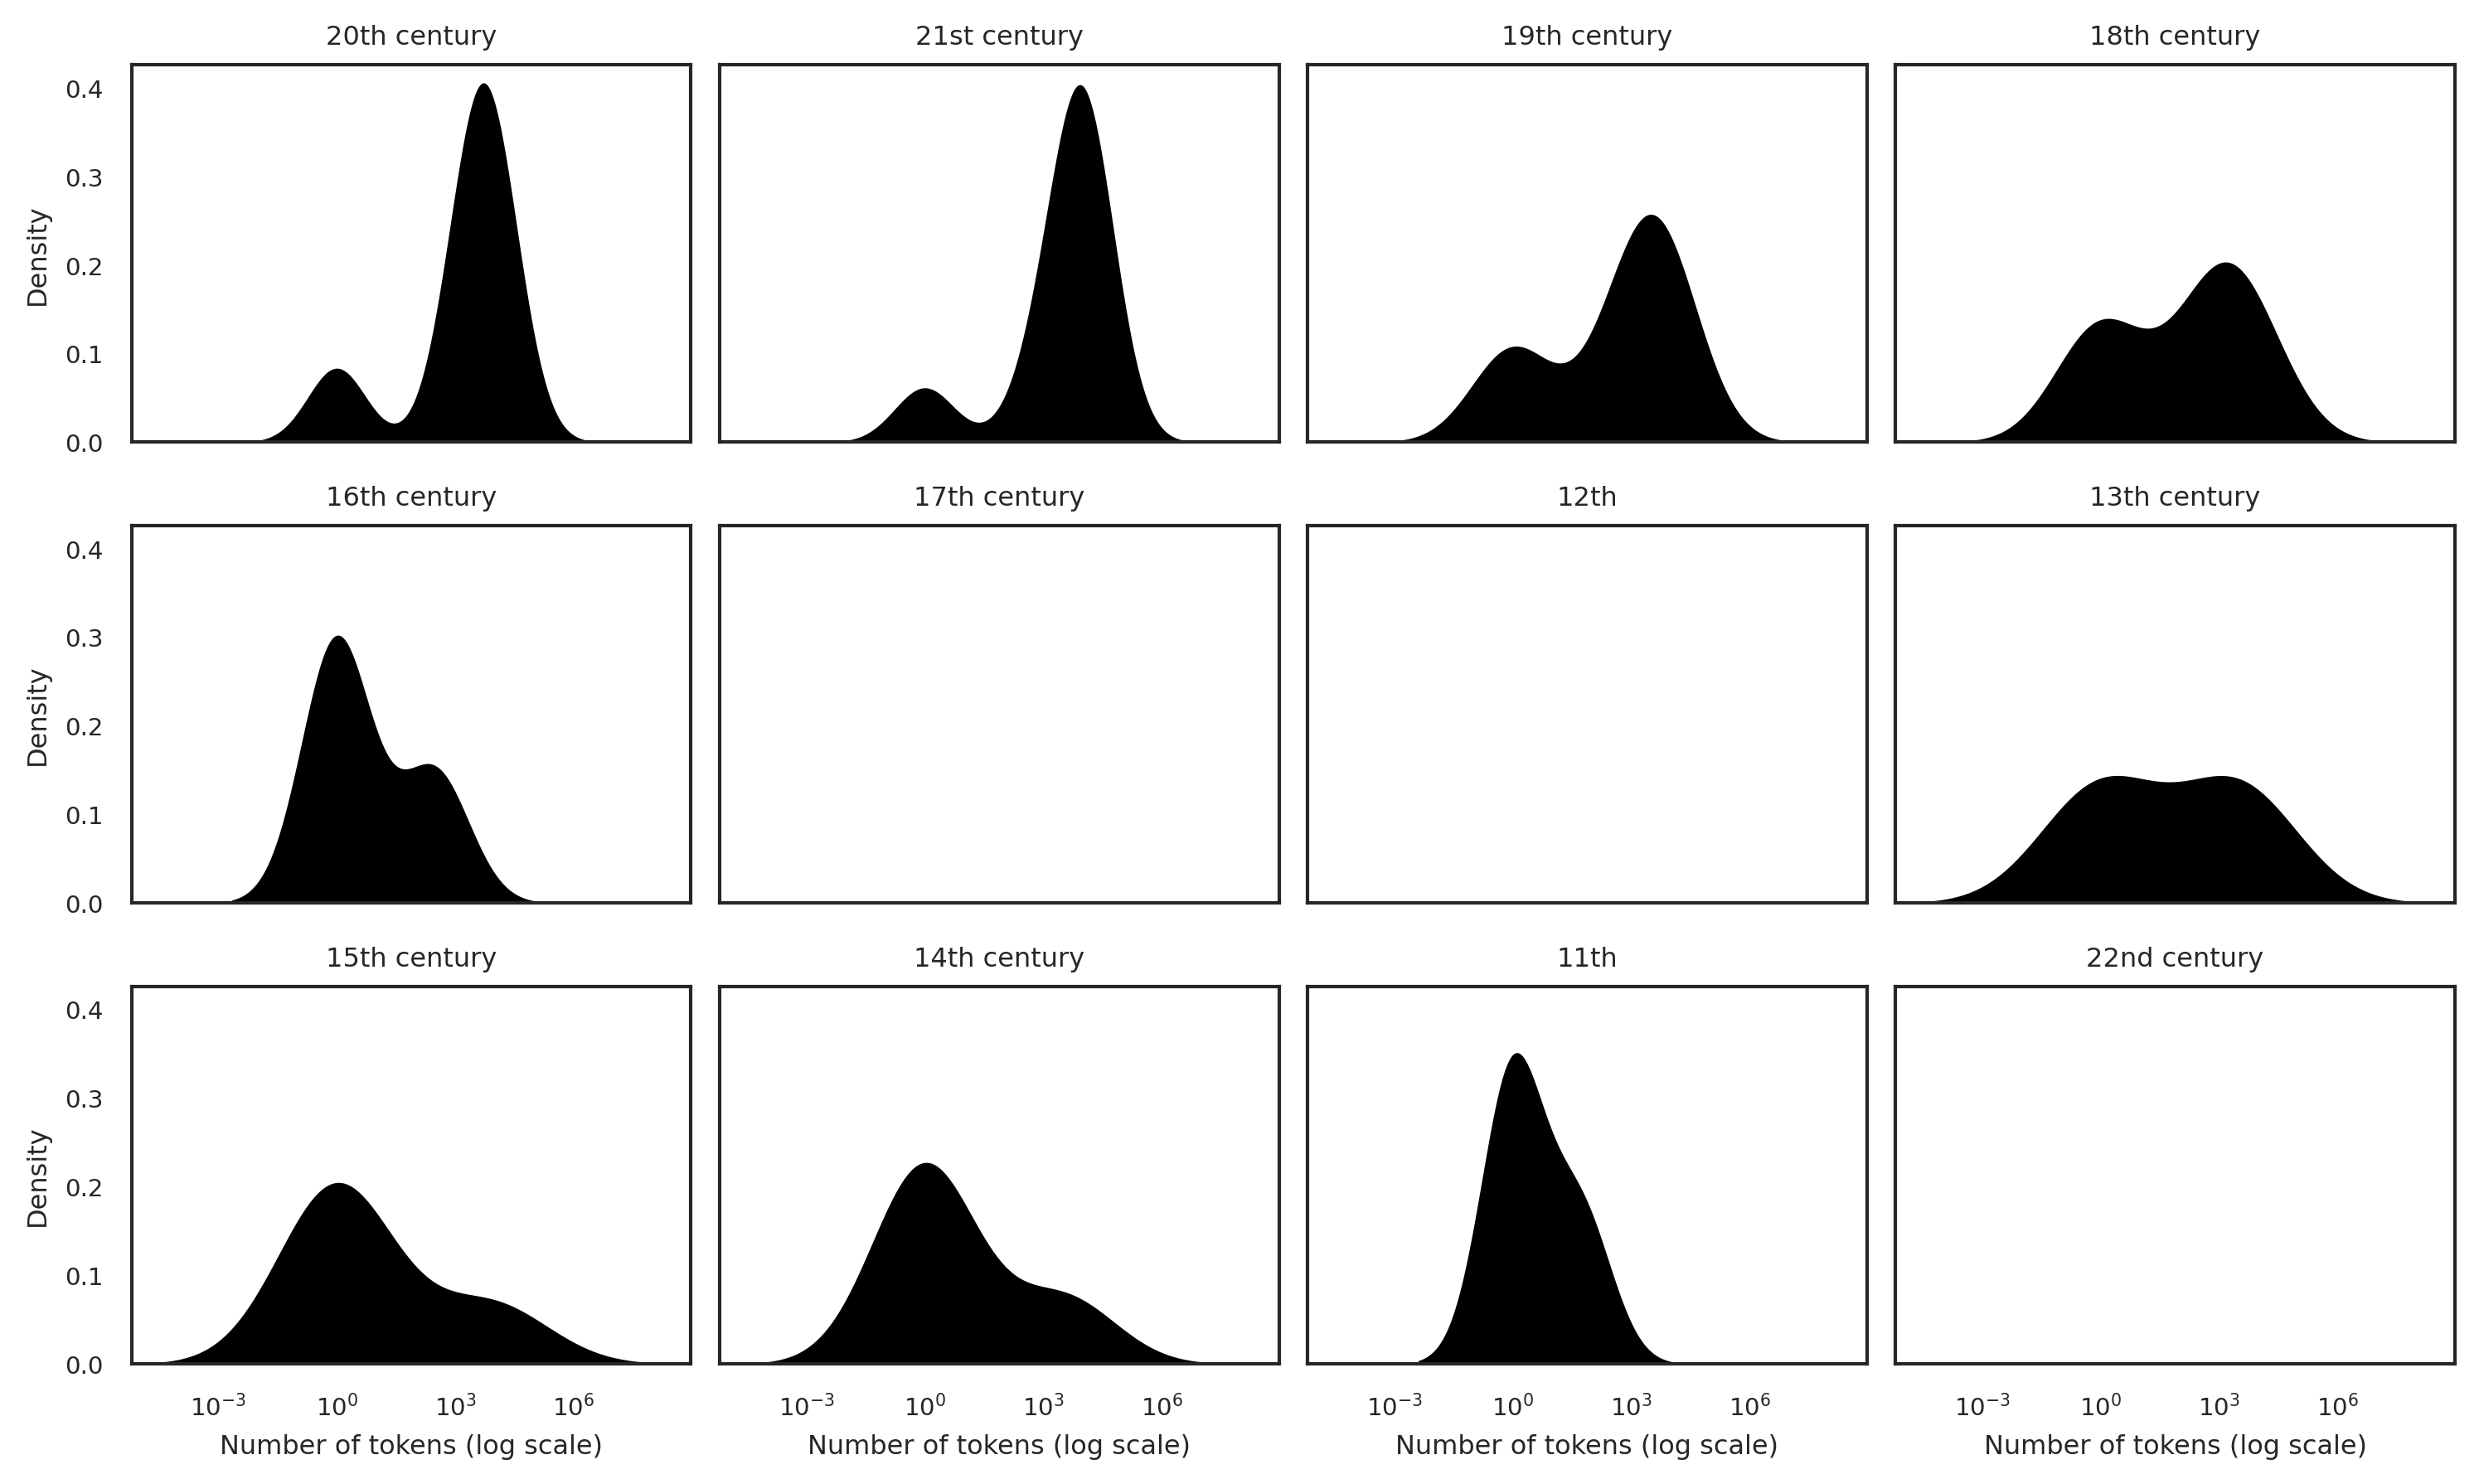

In [11]:
categories = sampled_contents.groupby('Category')
def categoria_subplot(subgroup, title, position):
    sns.kdeplot(ax = position, data=subgroup, x='content_len', log_scale=True, fill=True, alpha=1, linewidth=0, color='black')
    position.set(xlabel='Number of tokens (log scale)', title=title)
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10,6))

categoria_subplot(categories.get_group('Category:20th century (id: 884457, ns: 14)'), '20th century', ax[0,0])
categoria_subplot(categories.get_group('Category:21st century (id: 884422, ns: 14)'), '21st century', ax[0,1])
categoria_subplot(categories.get_group('Category:19th century (id: 884481, ns: 14)'), '19th century', ax[0,2])
categoria_subplot(categories.get_group('Category:18th century (id: 884546, ns: 14)'), '18th century', ax[0,3])

categoria_subplot(categories.get_group('Category:16th century (id: 884483, ns: 14)'), '16th century', ax[1,0])
categoria_subplot(categories.get_group('Category:17th century (id: 884542, ns: 14)'), '17th century', ax[1,1])
categoria_subplot(categories.get_group('Category:12th century (id: 884616, ns: 14)'), '12th', ax[1,2])
categoria_subplot(categories.get_group('Category:13th century (id: 884730, ns: 14)'), '13th century', ax[1,3])

categoria_subplot(categories.get_group('Category:15th century (id: 884535, ns: 14)'), '15th century', ax[2,0])
categoria_subplot(categories.get_group('Category:14th century (id: 886533, ns: 14)'), '14th century', ax[2,1])
categoria_subplot(categories.get_group('Category:11th century (id: 884710, ns: 14)'), '11th', ax[2,2])
categoria_subplot(categories.get_group('Category:22nd century (id: 886534, ns: 14)'), '22nd century', ax[2,3])


plt.tight_layout()
plt.show()
fig.savefig("graficadensidadWiki")            

In [12]:
bigram_model, preprocessed = preprocess(sampled_contents['Content'], nlp=nlp, bigrams=True, detokenize=True, n_process=4)

In [13]:
len(preprocessed)

93

In [14]:
with open('processed_sample_contents.pkl', 'wb') as fp:
    pickle.dump(preprocess, fp)

with open('sample_contents_bigram_model.pkl', 'wb') as fp:
    pickle.dump(bigram_model, fp)

with open('processed_sample_contents.pkl', 'rb') as fp:
    preprocess = pickle.load(fp)

In [15]:
sampled_contents.iloc[10]['Content']

'[Section: Name (1):\nThe two names are used interchangeably, as para-synonyms for the same rituals, the "Miracula" (Feast of Miracles) having more to do with the religious deeds of the martyrs, and the "Mirabilia" (Feast of Wonders) having more to do with nature and secular beliefs. Indeed, in the tradition of the cult of the martyrs of 177, Gregory of Tours reports a miraculous apparition of the martyrs above the Rhône, asking that their relics be removed from the river.\nThe Pont du Change, the only bridge over the Saône at the time, had only one navigable arch (on the Saint-Nizier church side). This only possible passage for boats also featured a rapid nicknamed the "Mort-qui-trompe" (the deceiver). In the Middle Ages, this arch was known as the "marvelous arch", according to the feast.\nSubsections (0):\n, Section: History (1):\nThe feast of Wonders was part of a long tradition of sanctifying and celebrating water, particularly around the Rhône. It has its roots in the miracles as

In [16]:
sampled_contents['preprocessed'] = preprocess

In [17]:
sampled_contents.iloc[10]['preprocessed']

<function dcss.text.preprocess(texts, nlp=<spacy.lang.en.English object at 0x7394614acb20>, bigrams=False, detokenize=True, n_process=1, custom_stops=[])>

In [18]:
count_vectorizer = CountVectorizer(max_df=.1, min_df=3, strip_accents='ascii',)

In [19]:
count_matrix = count_vectorizer.fit_transform(preprocessed)
vocabulary = count_vectorizer.get_feature_names_out()
count_matrix.shape

(93, 2061)

In [20]:
with open('count_matrix.pkl', 'wb') as fp:
    pickle.dump(count_matrix, fp)

with open('vocabulary.pkl', 'wb') as fp:
    pickle.dump(vocabulary, fp)

In [21]:
count_data = pd.DataFrame.sparse.from_spmatrix(count_matrix)
count_data.columns = vocabulary
count_data.index = sampled_contents['Category']
count_data.shape

(93, 2061)

In [22]:
print('sparse szie: ' +str(count_data.memory_usage().sum()/1048576) + "MB")
print ('sparse density: '+str(count_data.sparse.density))

sparse szie: 0.109130859375MB
sparse density: 0.049427931946596546


In [23]:
count_data_d = count_data.sparse.to_dense()
print('dense size:' + str(count_data_d.memory_usage().sum()/1048576) + "MB")

dense size:1.4630584716796875MB


In [24]:
category_counts = sparse_groupby(sampled_contents['Category'], count_matrix, vocabulary)
results = category_counts.div(category_counts.sum(axis=1), axis=0)
results_t = results.T
results_t.sample(20, random_state=1006)

                  Category:11th century (id: 884710, ns: 14)  \
dependency_ratio                                         0.0   
confident                                                0.0   
bomb                                                     0.0   
powell                                                   0.0   
passion                                                  0.0   
surge                                                    0.0   
silly                                                    0.0   
gate                                                     0.0   
selling                                                  0.0   
lake                                                     0.0   
neustadt                                                 0.0   
suburb                                                   0.0   
comedy                                                   0.0   
enlightenment                                            0.0   
silk                                    

In [26]:
n_top_words = 5
n_top_words_per_category = {}

for category in results_t.columns:
    top = results_t[category].nlargest(n_top_words)
    n_top_words_per_category[category] = list(zip(top.index, top))

for k, v in n_top_words_per_category.items():
    print(k.upper())
    for each in v:
        print(each)
    print('\n')

AttributeError: 'SparseDtype' object has no attribute 'itemsize'

In [27]:
diff_con_snp = results_t['Category:18th century (id: 884546, ns: 14)'] - results_t['Category:19th century (id: 884481, ns: 14)']
diff_con_snp.sort_values(ascending=False)
eighteen_not_snp = diff_con_snp.head(20)
nineteen_not_snp = diff_con_snp.tail(20)


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:1000: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  comp = pd.to_numeric(converter.convert_units(orig)).astype(float)


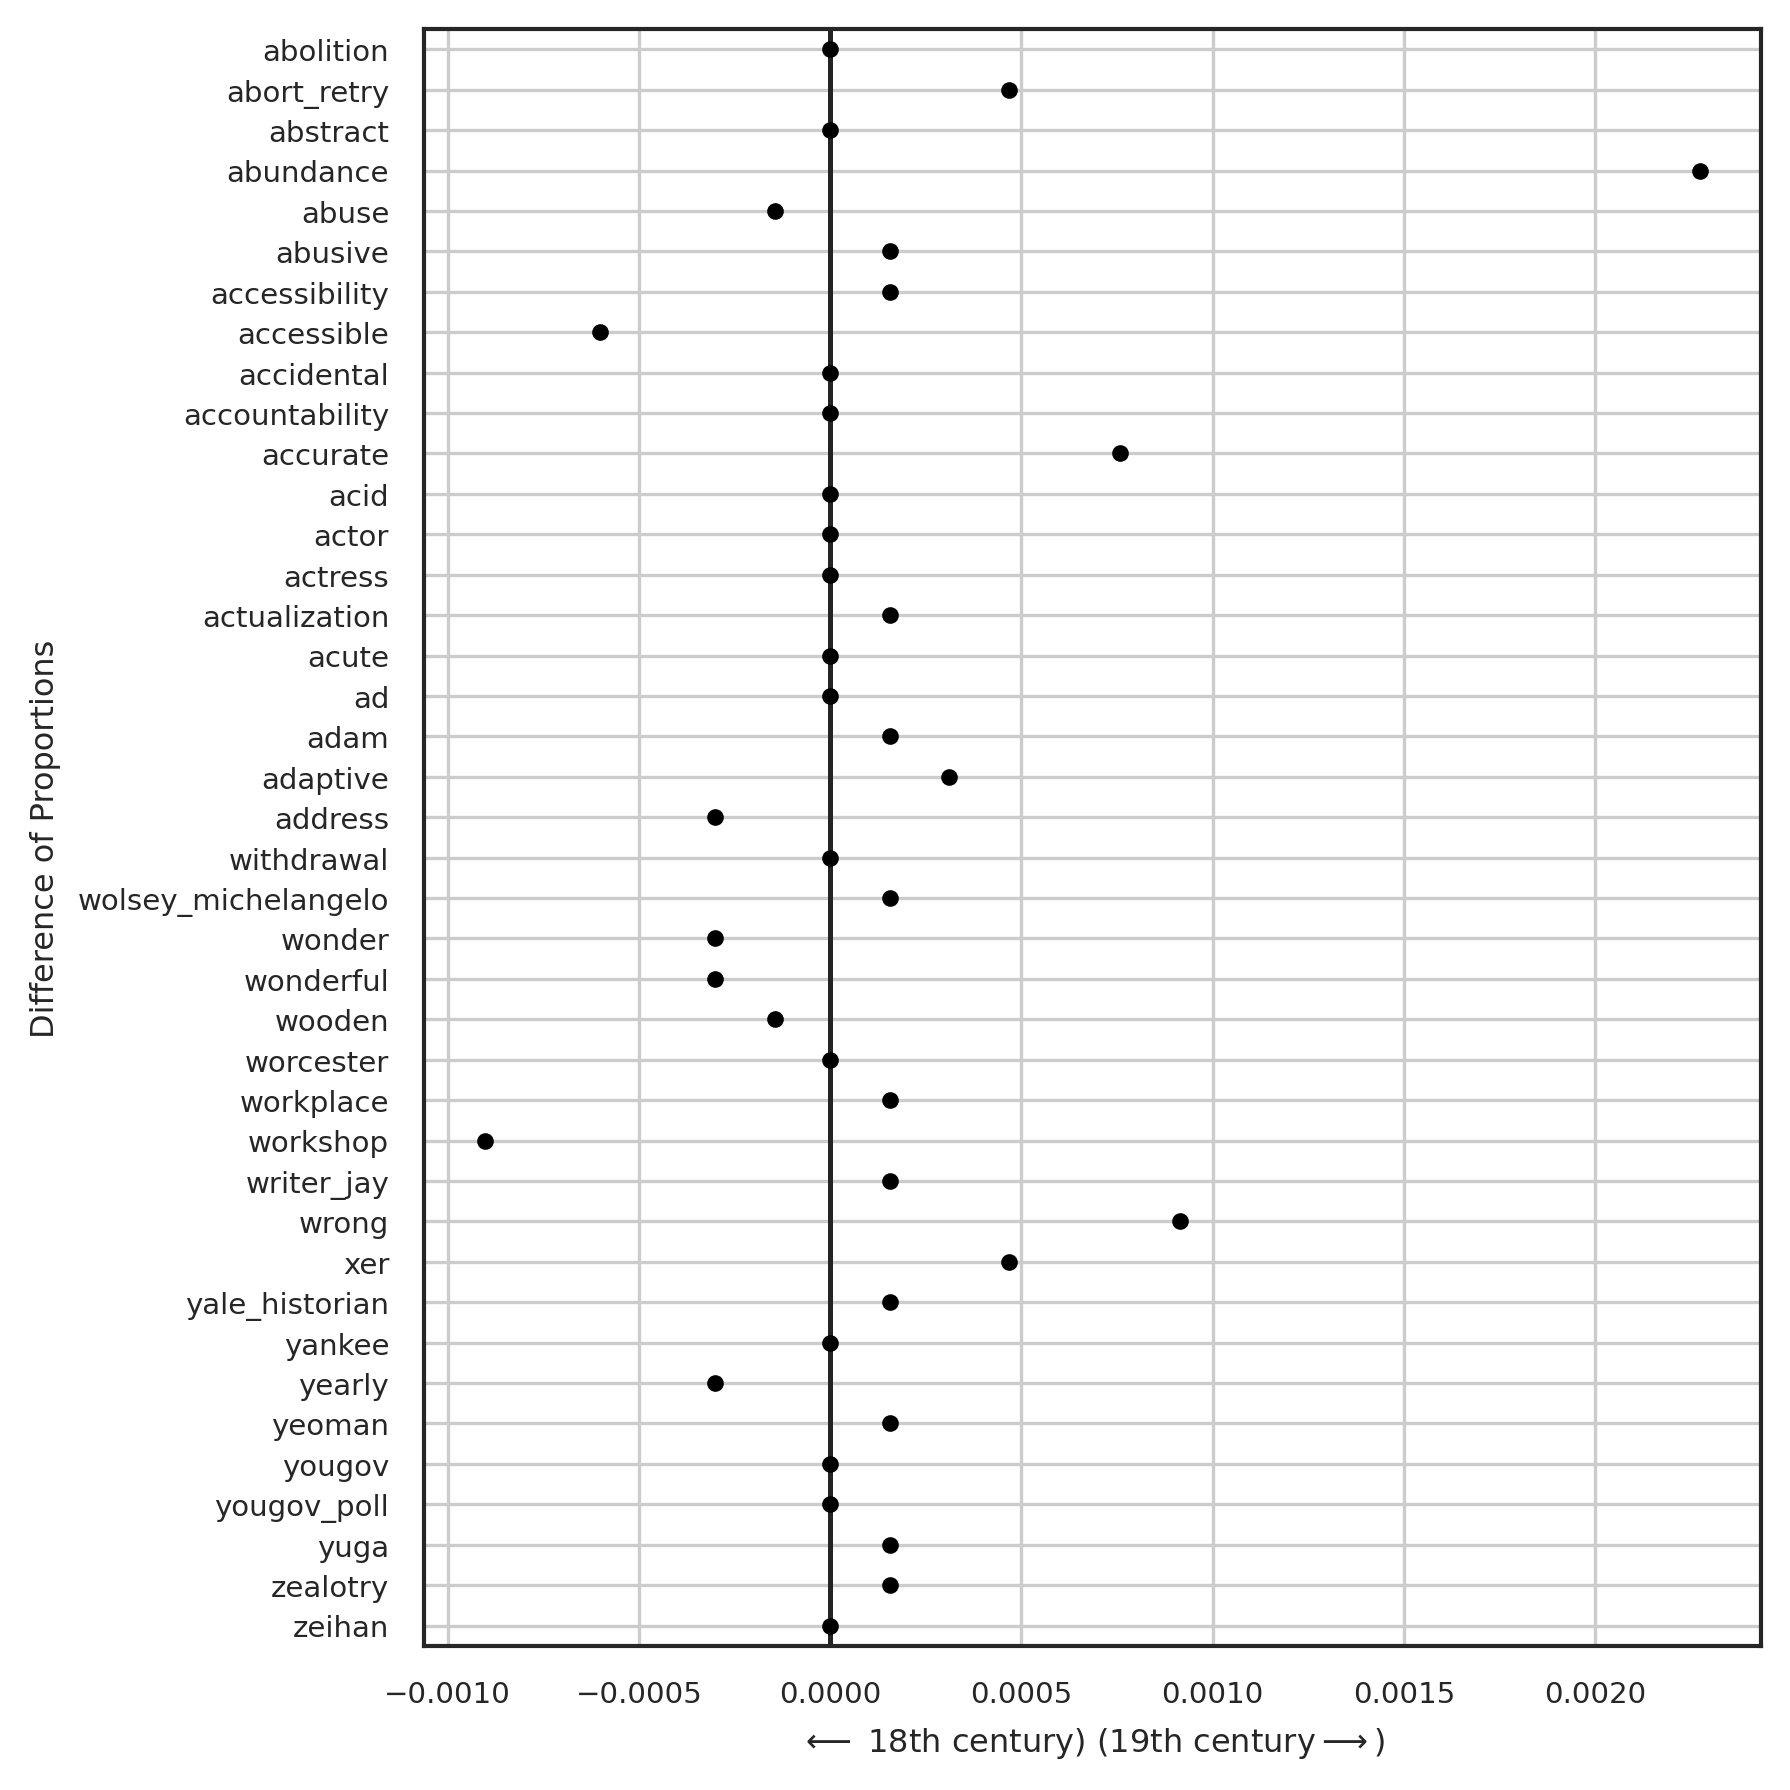

In [28]:
dop = pd.concat([eighteen_not_snp, nineteen_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'$\longleftarrow$ 18th century) (19th century$\longrightarrow$)', ylabel='Difference of Proportions')
plt.tight_layout()

In [ ]:
diff_con_snp = results_t['Category:20th century (id: 884457, ns: 14)'] - results_t['Category:21st century (id: 884422, ns: 14)']
diff_con_snp.sort_values(ascending=False)
twenty_not_snp = diff_con_snp.head(20)
twenty_one_not_snp = diff_con_snp.tail(20)

In [29]:
dop = pd.concat([twenty_not_snp, twenty_one_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'$\longleftarrow$ 20th century) (21th century$\longrightarrow$)', ylabel='Difference of Proportions')
plt.tight_layout()

NameError: name 'twenty_not_snp' is not defined

In [30]:
diff_con_snp = results_t['Category:11th century (id: 884710, ns: 14)'] - results_t['Category:15th century (id: 884535, ns: 14)']
diff_con_snp.sort_values(ascending=False)
eleven_not_snp = diff_con_snp.head(20)
fifteen_one_not_snp = diff_con_snp.tail(20)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:1000: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  comp = pd.to_numeric(converter.convert_units(orig)).astype(float)


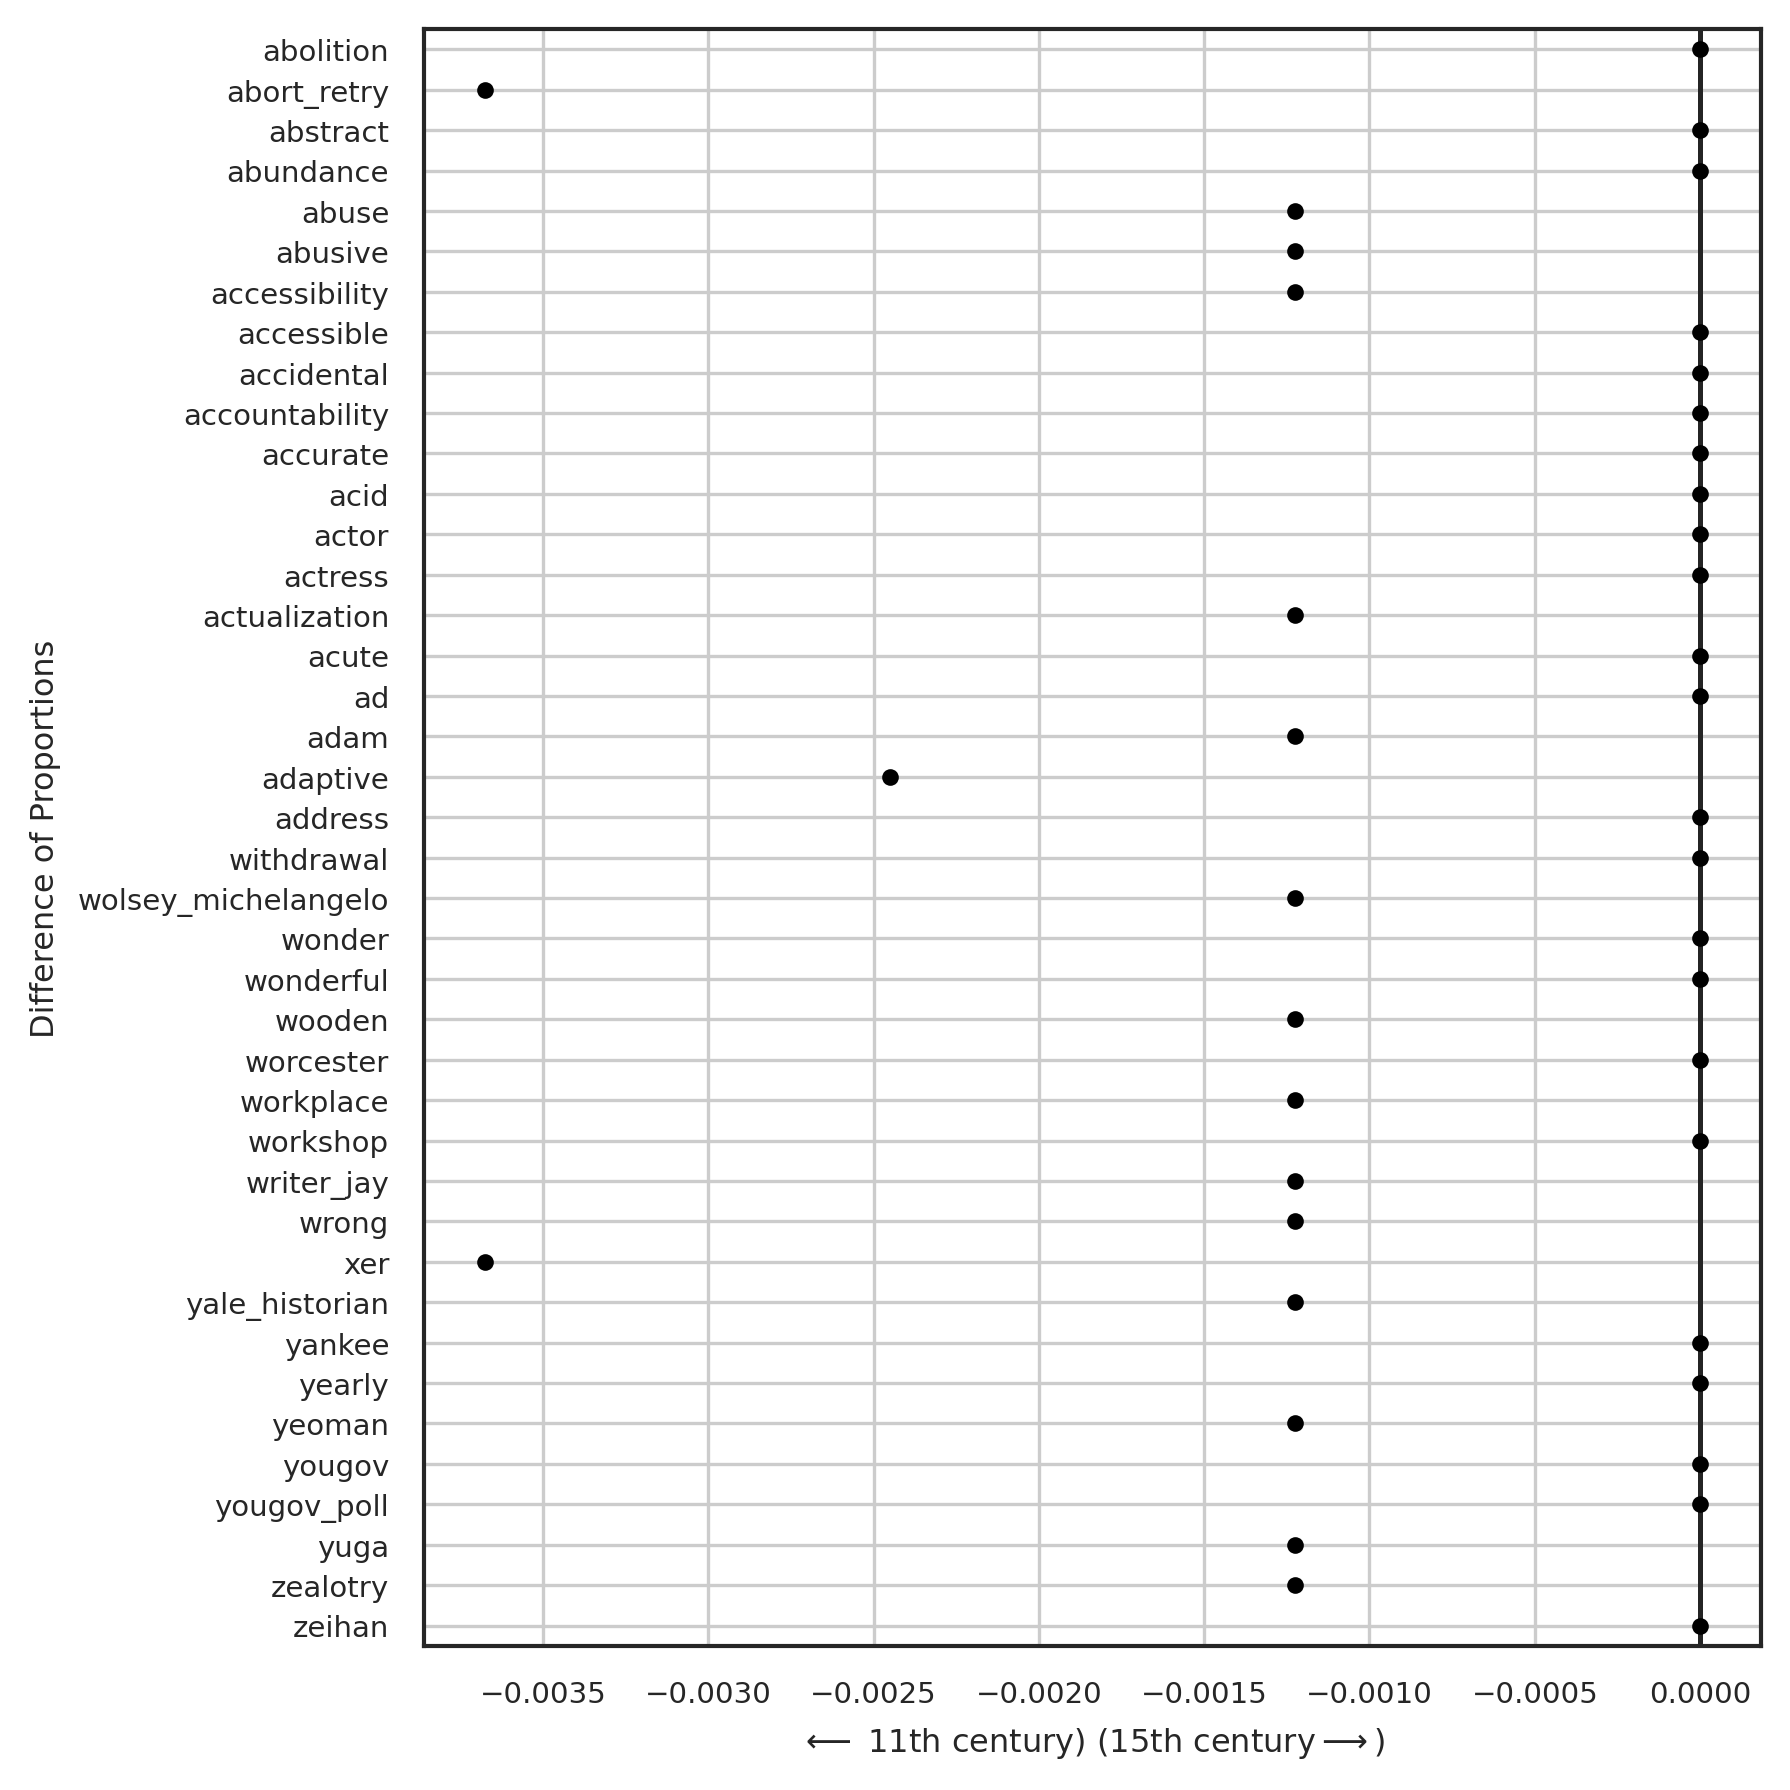

In [31]:
dop = pd.concat([eleven_not_snp, fifteen_one_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'$\longleftarrow$ 11th century) (15th century$\longrightarrow$)', ylabel='Difference of Proportions')
plt.tight_layout()

In [36]:
diff_con_snp = results_t['Category:14th century (id: 886533, ns: 14)'] - results_t['Category:17th century (id: 884542, ns: 14)']
diff_con_snp.sort_values(ascending=False)
fourteen_not_snp = diff_con_snp.head(20)
seventeen_one_not_snp = diff_con_snp.tail(20)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:1000: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  comp = pd.to_numeric(converter.convert_units(orig)).astype(float)


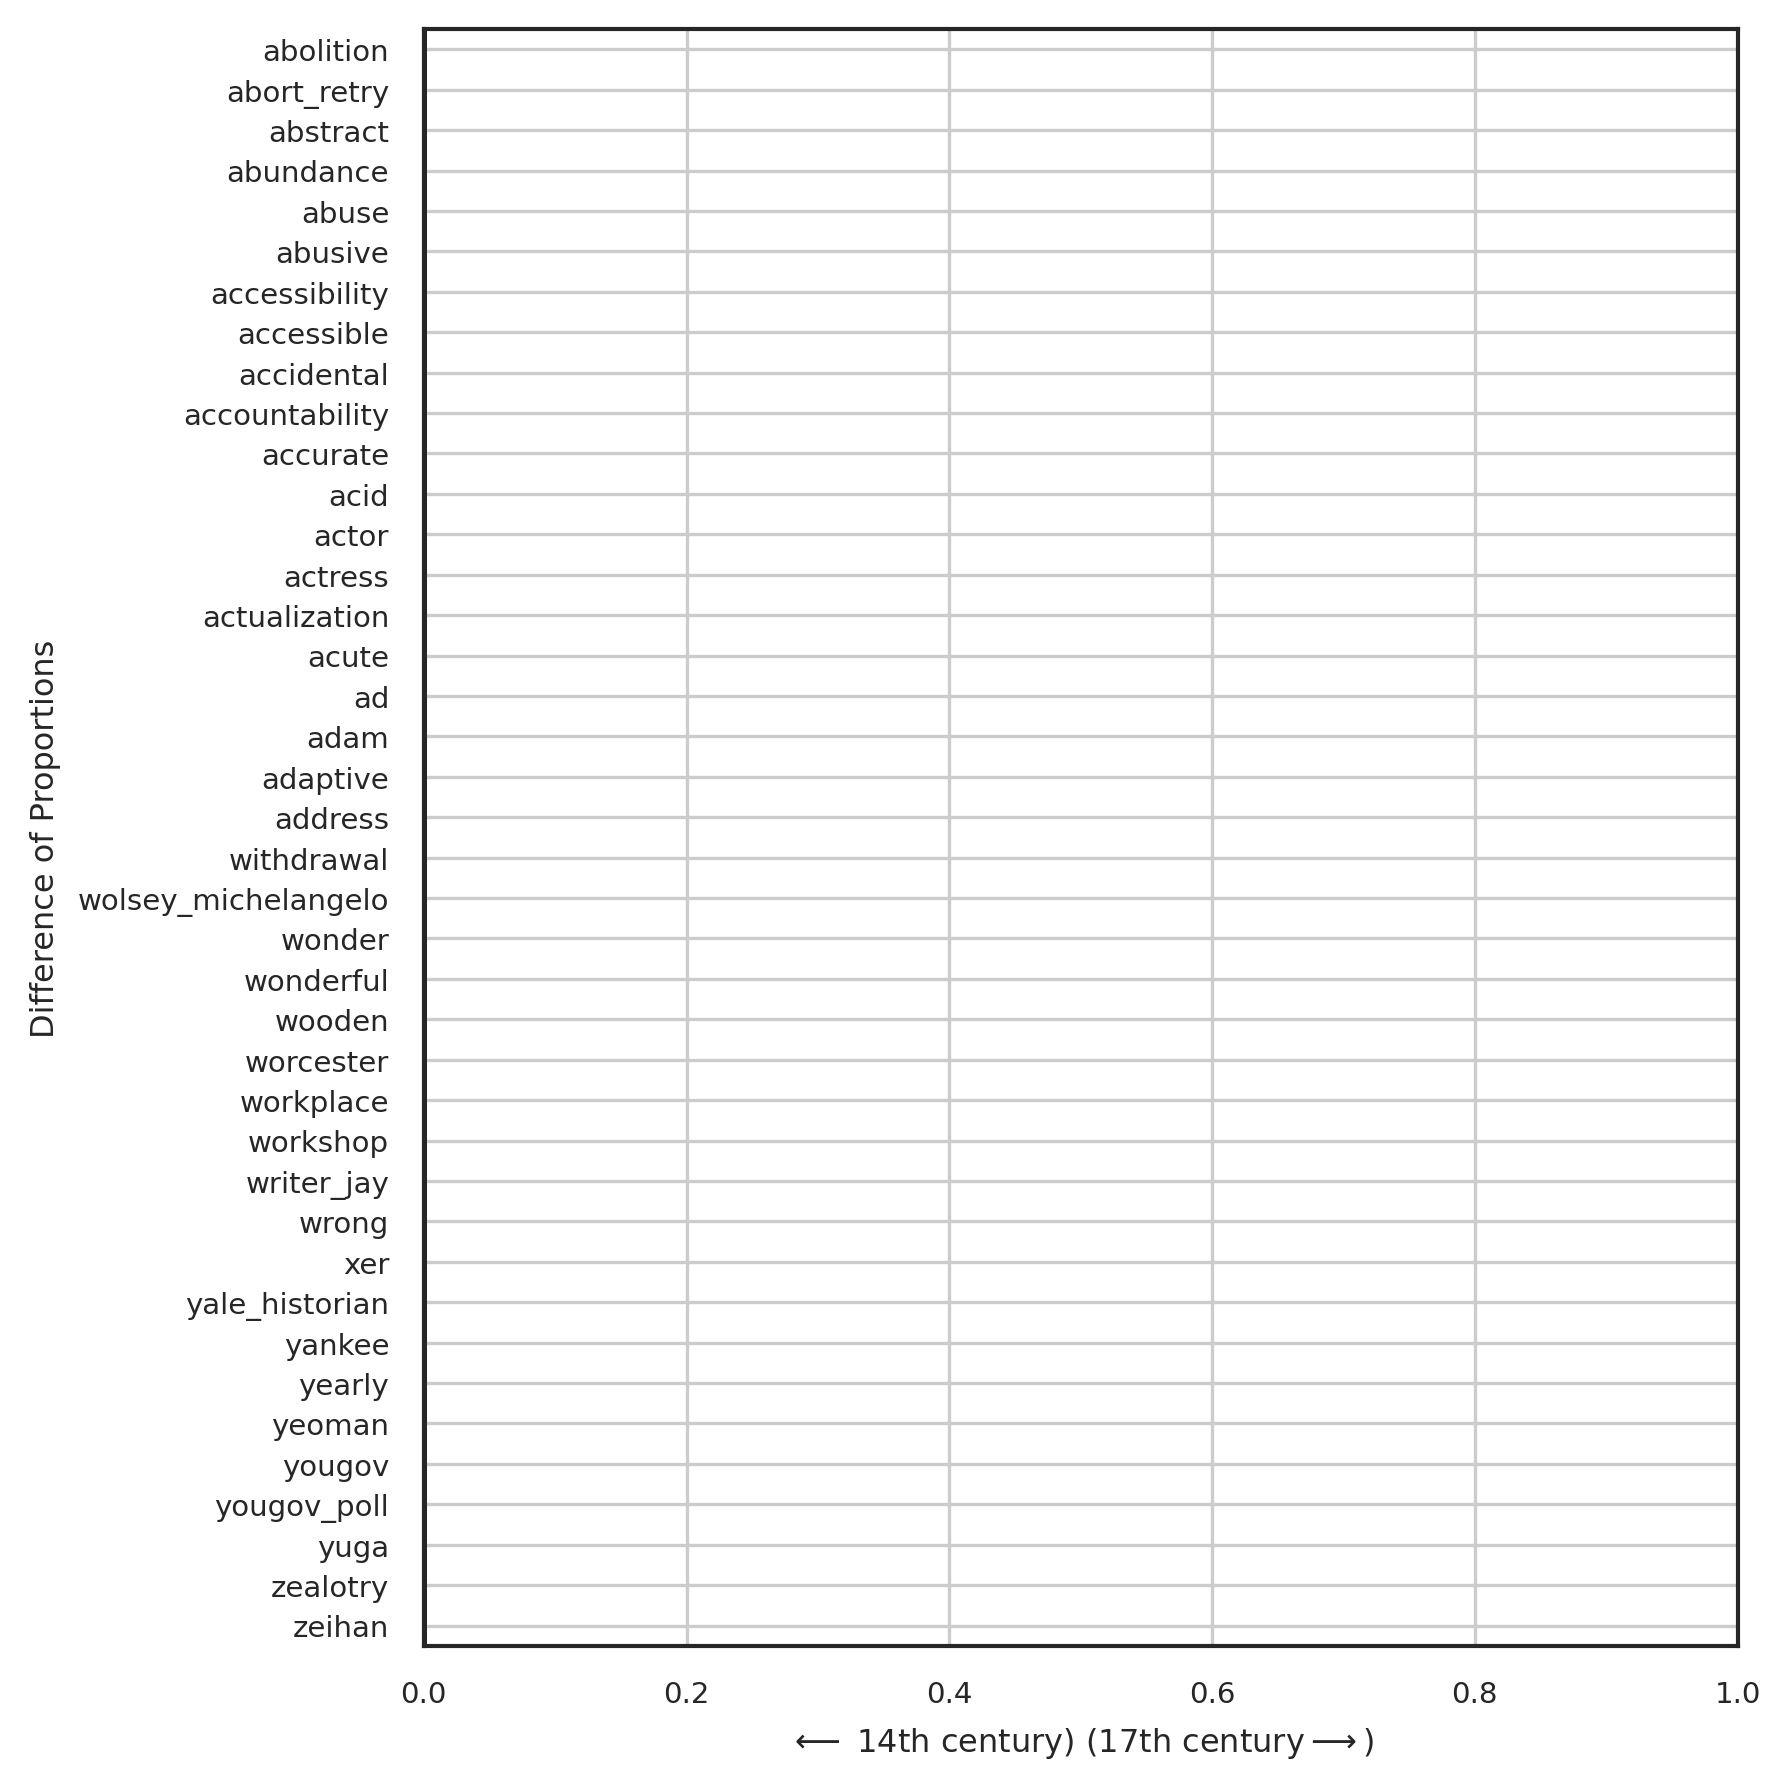

In [37]:
dop = pd.concat([fourteen_not_snp, seventeen_one_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'$\longleftarrow$ 14th century) (17th century$\longrightarrow$)', ylabel='Difference of Proportions')
plt.tight_layout()

In [38]:
diff_con_snp = results_t['Category:18th century (id: 884546, ns: 14)'] - results_t['Category:16th century (id: 884483, ns: 14) ']
diff_con_snp.sort_values(ascending=False)
eighteen_not_snp = diff_con_snp.head(20)
sixteen_not_snp = diff_con_snp.tail(20)

KeyError: 'Category:16th century (id: 884483, ns: 14) '

In [35]:
dop = pd.concat([eighteen_not_snp, sixteen_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'$\longleftarrow$ 18th century) (16th century$\longrightarrow$)', ylabel='Difference of Proportions')
plt.tight_layout()

NameError: name 'sixteen_not_snp' is not defined